# ECE 311 Lab 3: Z-Transform and LSI Systems
## Due Date: 10/2 @ 11:59pm on Canvas
## You may assume all systems are causal for this lab!

In this lab, we will explore how to work with the z-transform and apply some of the more abstract things you have learned in ECE 310 thus far. This will be a shorter lab since there will not be many applications. Let's get started with some background and review of the z-transform.

## Z-Transform Background

The z-transform is a linear transform that can be thought of as the discrete-time version of the Laplace transform from ECE 210. The z-transform is defined by:

$$
X(z) = \sum_{n=-\infty}^{\infty}x[n]z^{-n}.
$$

The z-transform can be visualized on the complex-valued z-plane where the x-axis is the real part of $z$ and the y-axis is the imaginary part of $z$. Therefore, like $s$ for the Laplace transform, $z$ has a real part and imaginary part. Furthermore, it is critical that we note the Region of Convergence (ROC) for each z-transform to guarantee its uniqueness. The ROC is defined as all values of $z$ that ensure the z-transform sum converges.

We frequently work with systems whose z-transform is given by a rational expression of the form

$$
X(z) = \frac{B(z)}{A(z)},
$$

where $A(z)$ and $B(z)$ are polynomials in $z^{-1}$. If we factorize the numerator and denominator, we arrive at a useful point of reference.

$$
X(z) = \frac{\prod_{i=1}^{N_z}(1-q_iz^{-1})}{\prod_{j=1}^{N_p}(1-p_jz^{-1})}
$$

In the above equation, each $q_i$ is a "zero" of the system and each $p_j$ is a "pole" of the system. When an input excites a pole of the system, the output blows up to infinty and when an input touches a zero, the output goes to zero. Note that both our poles and zeros can be complex valued! We depict our poles and zeros on a "pole-zero plot" of the z-plane where each pole is marked by an "x" and each zero is marked by an "o". The poles of an LSI system are essential to assessing BIBO stability. For a causal LSI system, the ROC is given by $|z| > p_{\textrm{max}}$, where $p_{\textrm{max}}$ is the largest or outermost pole. Conversely, for a non-causal LSI system, the ROC is given by $|z| < p_{\textrm{min}}$, the innermost or smallest pole. In either case, an LSI system is BIBO stable if and only if its ROC contains the unit circle: $|z| = 1$. Should the pole of interest lie on the unit circle, the system is marginally stable. But for this course and ECE 310, we say the system is unstable since there exists at least one bounded input that can create an unbounded output.

**For this lab, you may assume all systems are causal.**

The last thing we should discuss is how Linear Constant Coefficient Difference Equations (LCCDE) relate to the z-transform. Moving from an LCCDE is rather simple: we take the z-transform of both sides and remember to attach $z^-k$ for each term based on its delay argument according to the delay property of the z-transform. Below is an example of this process:

$$
y[n] - 3y[n-1] + 2y[n-2] = 2x[n] + x[n-1]
$$

Taking the z-transform of both sides:

$$
Y(z) - 3z^{-1}Y(z) + 2z^{-2}Y(z) = 2X(z) + z^{-1}X(z)
$$

$$
Y(z)(1-3z^{-1}+2z^{-2}) = X(z)(2+z^{-1})
$$

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{2+z^{-1}}{1-3z^{-1}+2z^{-2}}\cdot\frac{z^2}{z^2} = \frac{2z^2 +z}{z^2-3z+2}
$$

Factorizing the above rational expression would show us that we have poles at $z = 1$ and $2$ and a zero at $z = -\frac{1}{2}$. Furthermore, this system must *not* be BIBO stable since it is causal and its largest pole lies outside the unit circle. 

**Note that while the two expressions shown in the last line are equivalent, the second one with positive exponents is more compatible with Python libaries as the scipy functions assume "controls" notation as opposed to our signal processing notation. For this lab, we will follow the notation that matches the scipy documentation.** We refer to the $H(z)$ shown above as the transfer function of the system. By convention a transfer function is defined as

$$
H(z) = \frac{\sum_{i=0}^{N-1}b_iz^{-i}}{1+\sum_{j=1}^{M-1}a_jz^{-j}}
$$

Note that the first term in the denominator is a "1" to represent the system output not being scaled. It is important to keep these conventions in mind when utilizing Python library functions that expect them. Now that the background is done, let's try out some code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio # listening to audio

from pz_plot import pz_plot # pole-zero plotting utility
from scipy import signal
from scipy.io import wavfile # audio i/o

%matplotlib inline

We will start by working from a transfer function to its pole-zero plot and corresponding impulse response. Our example system is given by:

$$
H(z) = \frac{z^{2}-\frac{1}{2}z}{z^2-z+1}
$$

To extract its poles and zeros we will use $\textrm{signal.tf2zpk()}$. We have provided a plotting function that takes a list or array of poles and zeros, respectively, to visualize the resulting pole-zero plot.

Poles: [0.5+0.8660254j 0.5-0.8660254j]
Zeros: [0.5 0. ]


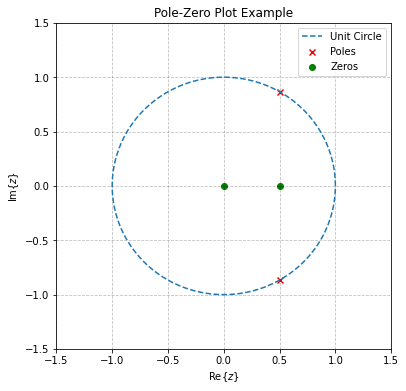

In [3]:
b = [1, -0.5, 0] # numerator coefficients, make sure to align zeros where delay terms don't align
a = [1, -1, 1] # denominator coefficients
z, p, k = signal.tf2zpk(b, a) # k is system gain -> okay to ignore this

print('Poles:', p)
print('Zeros:', z)
"""
pz_plot(zeros_list, poles_list, plot_title)
zeros_list = list or array of transfer function's zeros
poles_list = list or array of transfer function's poles
plot_title = string for title of your plot
"""

pz_plot(z, p, 'Pole-Zero Plot Example')

Next, we can find the impulse response of our system using $\textrm{signal.dimpulse()}$. There are a few ways to use this function and we will opt to use the system coefficients ($a$ and $b$).

Text(0.5, 1.0, 'Impulse Response of Example System')

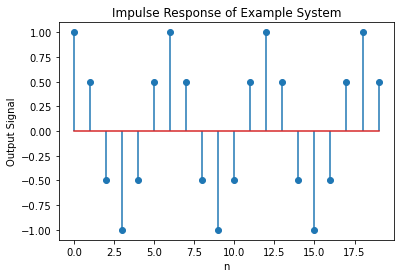

In [4]:
n,y = signal.dimpulse((b, a, 1), n=20) # the 1 is for the change in time per sample, n=20 means 20 points for output
h_n = y[0] # need to access output from returned object

plt.figure()
plt.stem(n, h_n) # plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System')

# Exercise 1: Working with Transfer Functions

For each of the following transfer functions, plot the pole-zero plot and (stem plot) impulse response for the requested number of points using the previously discussed functions. Try to verify the poles and zeros you find and the resulting impulse response by hand. Explain why each system is BIBO stable or not. If the system is not BIBO stable, give an example of a bounded input that would yield an unbounded output.

$
\begin{align}
a. H_1(z) = \frac{1}{2} + \frac{1}{4}z^{-2} - \frac{1}{4}z^{-4}, \quad 0\leq n\leq 5
\end{align}
$

$
\begin{align}
b. H_2(z) = \frac{\frac{1}{2}z^2+\frac{1}{4}z}{z^2-\frac{\sqrt{2}}{2}z+\frac{1}{4}}, \quad 0\leq n\leq 20
\end{align}
$

$
\begin{align}
c. H_3(z) = \frac{z^3+z^2}{z^3-1}, \quad 0\leq n\leq 20
\end{align}
$

Text(0.5, 1.0, 'Impulse Response of Example System C')

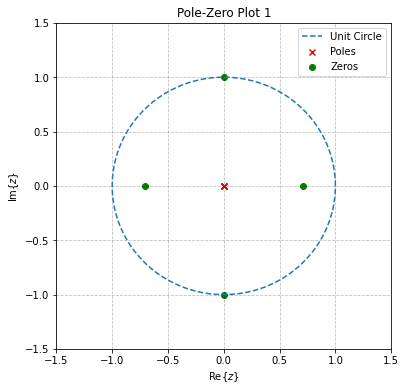

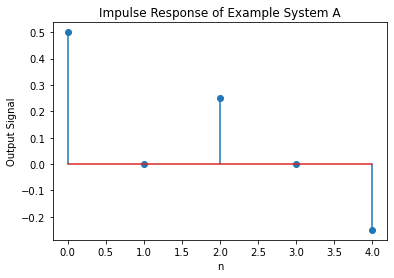

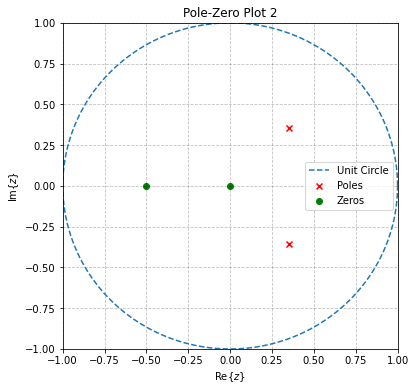

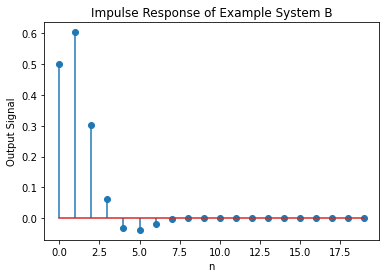

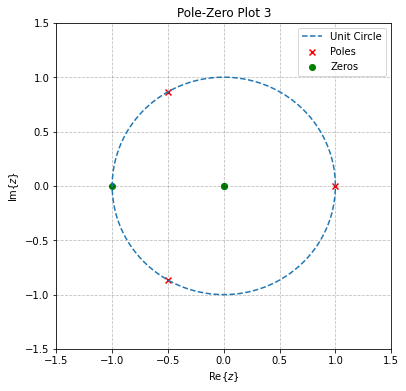

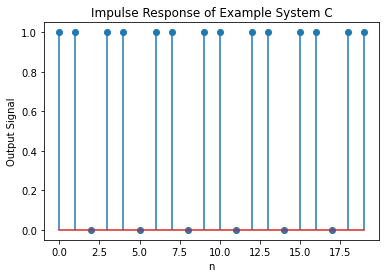

In [6]:
# Code for 1.a

b1 = [2,0,1,0,-1] # Numerator
a1 = [4,0,0,0,0] # Denomonator

z1, p1, k1 = signal.tf2zpk(b1, a1)
pz_plot(z1, p1, 'Pole-Zero Plot 1')


n1,y1 = signal.dimpulse((b1, a1, 1), n=5) # the 1 is for the change in time per sample, n=20 means 20 points for output
h_n1 = y1[0] # need to access output from returned object

plt.figure()
plt.stem(n1, h_n1) # plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System A')

# Code for 1.b

b2 = [.5,.25, 0]
a2 = [1,-(np.sqrt(2)/2), .25]

z2, p2, k2 = signal.tf2zpk(b2, a2)
pz_plot(z2, p2, 'Pole-Zero Plot 2')


n2,y2 = signal.dimpulse((b2, a2, 1), n=20) # the 1 is for the change in time per sample, n=20 means 20 points for output
h_n2 = y2[0] # need to access output from returned object

plt.figure()
plt.stem(n2, h_n2) # plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System B')


# Code for 1.c

b3 = [1,1,0,0]
a3 = [1,0,0,-1]

z3, p3, k3 = signal.tf2zpk(b3, a3)
pz_plot(z3, p3, 'Pole-Zero Plot 3')


n3,y3 = signal.dimpulse((b3, a3, 1), n=20) # the 1 is for the change in time per sample, n=20 means 20 points for output
h_n3 = y3[0] # need to access output from returned object

plt.figure()
plt.stem(n3, h_n3) # plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System C')

## Comments here:

Part 1(a):

This one is BIBO stable as both of the poles reside inside of the unit Circle. 


Part 1(b):

This one is BIBO stable as both of the poles reside inside of the unit circle


Part 1(c):

This one is marginally stable as the poles reside on the unit circlea

a bounded input would be w = pi/3

which would end up with

x[n] = cos(pi/3 * n)



# Exercise 2: Working from an LCCDE

For each of the following LCCDEs, determine the numerator and denominator coefficients, $a$ and $b$, respectively by hand. Using these coefficients, plot the pole-zero plot and impulse response for the requested number of points. Explain why each system is BIBO stable or not.

$\begin{align}
a. y_1[n] = x[n] - \frac{1}{2}x[n-1] + \frac{1}{4}x[n-2] - \frac{1}{8}x[n-3], \quad 0 \leq n \leq 5
\end{align}$

$\begin{align}
b.y_2[n] = y[n-1] - 2y[n-2] + y[n-3] + x[n] + \frac{1}{2}x[n-1], \quad 0\leq n \leq 20
\end{align}$

$\begin{align}
c. y_3[n] = \frac{1}{2}y[n-1] + \frac{1}{4}y[n-2] + \frac{1}{2}x[n] + \frac{1}{4}x[n-1], \quad 0\leq n \leq 20
\end{align}$

d. Is it possible for a system with a finite-length impulse response (FIR) like the one in 2.a to not be BIBO stable? Why or why not?

/Users/noah_duval/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
/Users/noah_duval/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


Text(0.5, 1.0, 'Impulse Response of Example System C')

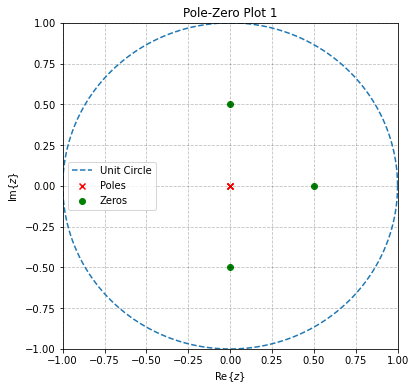

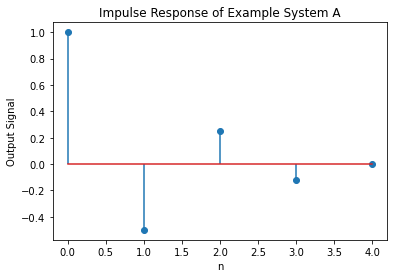

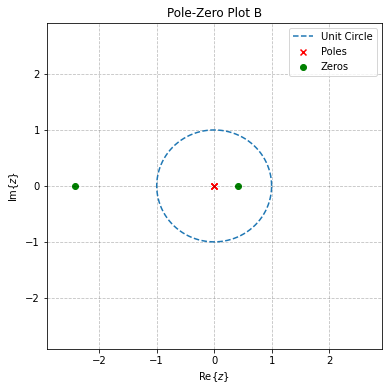

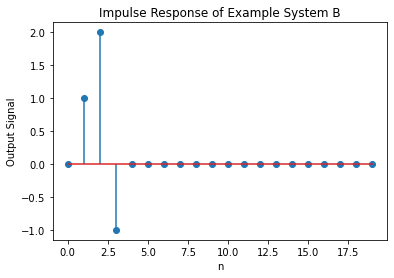

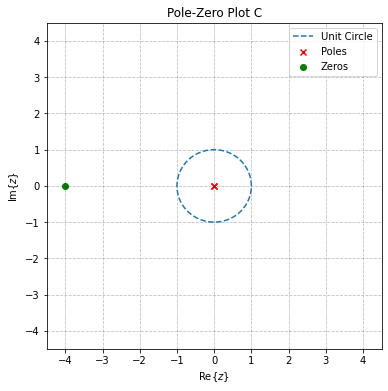

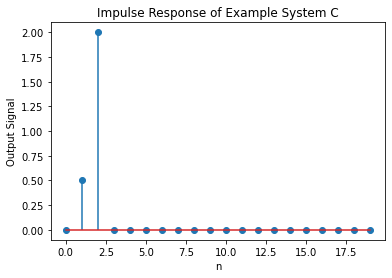

In [7]:
# Code for 2.a

ba = [8,-4,2,-1] # Numerator
aa = [8,0,0,0] # Denomonator

za, pa, ka = signal.tf2zpk(ba, aa)
pz_plot(za, pa, 'Pole-Zero Plot 1')


na,ya = signal.dimpulse((ba, aa, 1), n=5) # the 1 is for the change in time per sample, n=20 means 20 points for output
h_na = ya[0] # need to access output from returned object

plt.figure()
plt.stem(na, h_na) # plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System A')

# Code for 2.b

bb = [0,1,2,-1] # Numerator
ab = [1,0,0,0] # Denomonator

zb, pb, kb = signal.tf2zpk(bb, ab)
pz_plot(zb, pb, 'Pole-Zero Plot B')


nb,yb = signal.dimpulse((bb, ab, 1), n=20) # the 1 is for the change in time per sample, n=20 means 20 points for output
h_nb = yb[0] # need to access output from returned object

plt.figure()
plt.stem(nb, h_nb) # plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System B')

# Code for 2.c

bc = [0,1,4] # Numerator
ac = [2,0,0] # Denomonator

zc, pc, kc = signal.tf2zpk(bc, ac)
pz_plot(zc, pc, 'Pole-Zero Plot C')


nc,yc = signal.dimpulse((bc, ac, 1), n=20) # the 1 is for the change in time per sample, n=20 means 20 points for output
h_nc = yc[0] # need to access output from returned object

plt.figure()
plt.stem(nc, h_nc) # plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System C')



## Comments here:

Part 2(a):

This one is BIBO stable as both of the poles reside inside of the unit Circle. 


Part 2(b):
This one is BIBO stable as both of the poles reside inside of the unit Circle. 

Part 2(c):
This one is BIBO stable as both of the poles reside inside of the unit Circle. 

Part 2(d):
    it is not possible for a system with a finite-length impulse response (FIR) to be not BIBO stable; FIR systems are inherently BIBO stable by definition.
    

# Exercise 3: Applying a Filter using Transfer Functions

So far, we have only characterized LSI systems. Now let's use them as filters! Using $\textrm{signal.lfilter(b, a, input)}$ apply each of the following filters to each of the inputs. Plot the resulting outputs for the same length as the provided input signals. You may find documentation for the filtering function <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html">here</a>.

$\begin{align}
a. H_1(z) = \frac{1}{2} - \frac{1}{2}z^{-1} + \frac{1}{2}z^{-2}
\end{align}$

$\begin{align}
b. y_2[n] = \frac{1}{2}y[n-1] + x[n] - x[n-2]
\end{align}$

$
\begin{align}
    \bullet~x_1[n] = \cos\left(\frac{\pi}{2}n\right), \quad 0 \leq n \leq 10
\end{align}
$

$
\begin{align}
    \bullet~x_2[n] = \left(\frac{1}{3}\right)^nu[n], \quad 0 \leq n \leq 10
\end{align}
$


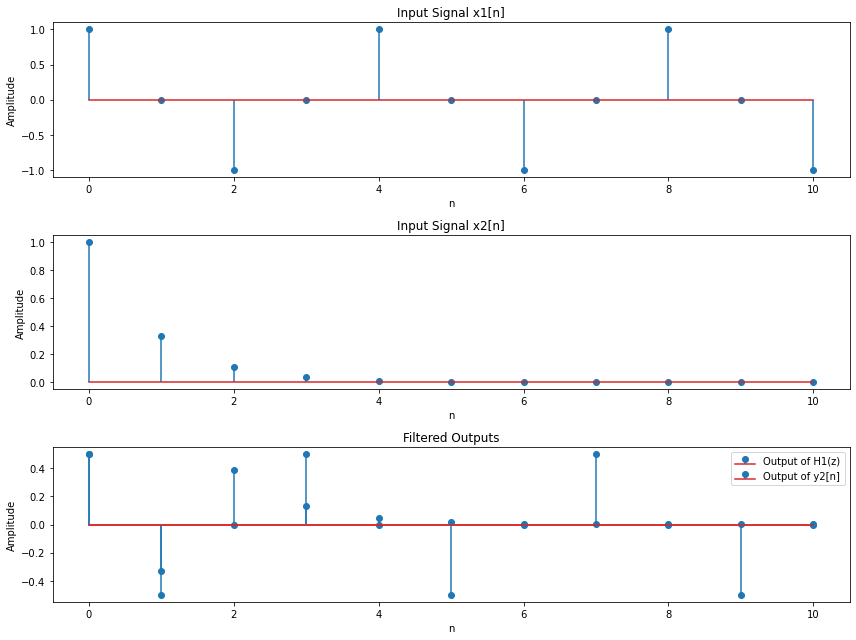

In [15]:
# Code for System A:


n = np.arange(11)  
x1 = np.cos(np.pi / 2 * n)
x2 = (1/3) ** n * (n >= 0)  

b1 = [0.5, -0.5, 0.5]
a1 = [1.0]

b2 = [1.0, -1.0, 1.0]
a2 = [2.0]  


y1 = signal.lfilter(b1, a1, x1)
y2 = signal.lfilter(b2, a2, x2)


plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.stem(n, x1)
plt.title('Input Signal x1[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 2)
plt.stem(n, x2)
plt.title('Input Signal x2[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 3)
plt.stem(n, y1, label='Output of H1(z)')
plt.stem(n, y2, label='Output of y2[n]')
plt.title('Filtered Outputs')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()



# Exercise 4: Marginal Stability

For this exercise, we will explore that "gray area" of stability from ECE 310: marginal stability. Recall that an LTI system is referred to as marginally stable if its ROC is $|z| > 1$ or $|z| < 1$. The following two LTI systems are marginally stable:

$\begin{align}
H_1(z) = \frac{z^2}{z^2 + 1},
\end{align}$

$\begin{align}
H_2(z) = \frac{z^2}{z^2 - \sqrt{2}z + 1}.
\end{align}$

a. Plot the pole-zero plot for both systems ($H_1(z)$ and $H_2(z)$).

Now, let's examine each system's response to some bounded inputs.

b. Plot the filtering output for each system for each of the following inputs. Remember to use $\textrm{signal.lfilter()}$ to obtain the system results. Please plot each system's set of outputs in one figure using $\textrm{plt.subplot()}$ and label your figures uniquely.

$
\begin{align}
    \bullet~x_1[n] = u[n], \quad 0 \leq n \leq 200
\end{align}
$

$
\begin{align}
    \bullet~x_2[n] = \cos\left({\frac{\pi}{2}n}\right), \quad 0 \leq n \leq 200
\end{align}
$

$
\begin{align}
    \bullet~x_3[n] = \cos\left({\frac{\pi}{4}n}\right), \quad 0 \leq n \leq 200
\end{align}
$

c. Comment on the results. Specifically, which inputs cause unbounded outputs for each system and why?

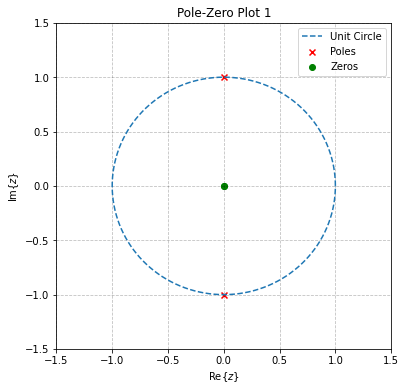

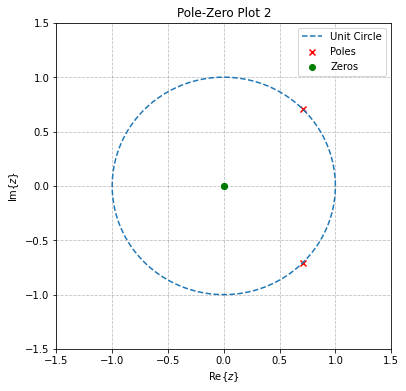

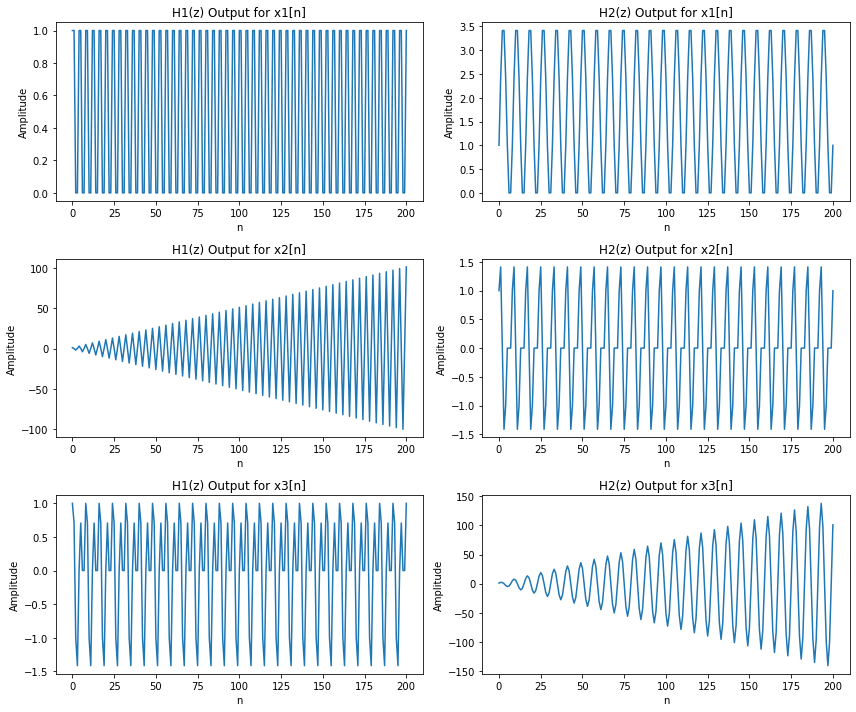

In [20]:
# Code for 4.a:

b4 = [1,0,0] # Numerator
a4 = [1,0,1] # Denomonator

z4, p4, k4 = signal.tf2zpk(b4, a4)
pz_plot(z4, p4, 'Pole-Zero Plot 1')


b5 = [1,0,0] # Numerator
a5 = [1,-np.sqrt(2),1] # Denomonator

z5, p5, k5 = signal.tf2zpk(b5, a5)
pz_plot(z5, p5, 'Pole-Zero Plot 2')

# Code for 4.b:


n = np.arange(201)
x1 = np.ones(201)  
x2 = np.cos(np.pi / 2 * n) 
x3 = np.cos(np.pi / 4 * n)  

y1_x1 = signal.lfilter(b4, a4, x1)
y1_x2 = signal.lfilter(b4, a4, x2)
y1_x3 = signal.lfilter(b4, a4, x3)

y2_x1 = signal.lfilter(b5, a5, x1)
y2_x2 = signal.lfilter(b5, a5, x2)
y2_x3 = signal.lfilter(b5, a5, x3)

plt.figure(figsize=(12, 10))

plt.subplot(321)
plt.plot(n, y1_x1)
plt.title('H1(z) Output for x1[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(322)
plt.plot(n, y2_x1)
plt.title('H2(z) Output for x1[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(323)
plt.plot(n, y1_x2)
plt.title('H1(z) Output for x2[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(324)
plt.plot(n, y2_x2)
plt.title('H2(z) Output for x2[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(325)
plt.plot(n, y1_x3)
plt.title('H1(z) Output for x3[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(326)
plt.plot(n, y2_x3)
plt.title('H2(z) Output for x3[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Remember to use subplots!



## Comments here:

Part 4(c):

for both the input x3[n]=cos⁡(π/4 * n) a 
 function with frequency π/4 leads to unbounded outputs. This occurs because the input frequency matches the frequency associated with the poles of the systems, causing resonance.

# Exercise 5: Inverse Filtering

Suppose we are transmitting audio through a low-quality channel modeled by the following system

$$
y[n] = -y[n-1] - \frac{1}{4}y[n-2] + 2x[n] - 2x[n-2],
$$

where $x$ is our input and $y$ is the channel output. The provided audio clip ``distorted-audio.wav`` is an example of audio corrupted by this channel. If we would like to correct this signal, we need to undo the effects of the channel. Note that the received signal $y[n]$ has a z-transform of

$$
Y(z) = H(z)X(z),
$$

where $H(z)$ is the transfer function of the channel. How can we fix our audio? Apply a filter that is the inverse of the problematic channel! So, what are you waiting for? Go save the day!

a. Determine the transfer function of the required inverse filter and apply it to the ``distorted-audio.wav`` file data. Play the resulting audio using $\textrm{Audio(data=audio_data, rate=fs)}$ like in Lab 1. Does the recovered signal sounds like the original? **Remember to be careful with the volume and be mindful of others around you as you test your code!**

b. Describe the qualitative differences between the original and distorted audio clips.

c. What is the relationship between the poles and zeros of the noisy channel and its inverse filter?

In [43]:
fs, clean = wavfile.read('clean-audio.wav') #reference for what the clean audio sounds like
fs, distorted = wavfile.read('distorted-audio.wav') #distorted audio signal
print(clean.shape) #shape of audio clip numpy arrays, only one channel for these clips
print(distorted.shape)

(132400,)
(132400,)


In [44]:
Audio(data=clean, rate=fs) #listen to clean audio, use headphones and start at low volume!

In [45]:
Audio(data=distorted, rate=fs) #listen to distorted version

In [67]:
# Code for 5.a:
# create inverse filter



b = [5/4,1,1]
a = [2]



# Apply the inverse filter to the audio data
result = signal.lfilter(b, a, distorted)





# typecast to appropriate data type, this helps the audio better match what we expect
result = result.astype(np.int16)

In [68]:
Audio(data=result, rate=fs) # listen to your result!

## Comments here:

Part 5(b):

The the result channel is not a clear as the clean one, but not as quite and fuzzy as the distorted one. Thus, I either am only half right or there is more that can be done to clear it up. 
Although I do think that it worked int he sense that the signal was cleared up and had a significant change in the volume of the signal. 

Part 5(c):

In the distored one there were poles that lies outside of the unit circle causing resonance and messsing up the signal. The filter ideally was to remove some of that and clear up the signal. 